In [1]:
### BREAST CANCER CASES ###
###### CONVOLUTIONAL NEURAL NETWORK CODE IN JUPYTER NOTEBOOK FOR BOTH SEX #####

In [2]:
## Modules required
import pandas as pd
import numpy as np
from scipy import misc 
from PIL import Image 
import glob 
from matplotlib.pyplot import imshow 
import seaborn as sn
import pickle 
from keras.preprocessing import image 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.imagenet_utils import decode_predictions 
from keras.utils import layer_utils, np_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from keras.utils.vis_utils import model_to_dot 
from keras.utils import plot_model 
from keras.initializers import glorot_uniform 
from keras import losses 
import keras.backend as K 
from keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix, classification_report 
from keras import layers 
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Input, Add, ZeroPadding2D, Conv2D, MaxPooling2D 
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [3]:
# Code
BC = (pd.read_excel('cancer.xlsx'))

In [4]:
BC.head()

,PatStatus,Race,MarST,Gender,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,1,3,1,0,52,3,0,5,1,4,...,1,1,5,1,1,1,1,2,1,1
1,1,3,1,0,48,3,0,4,3,5,...,1,1,1,1,0,1,0,1,0,1
2,0,3,0,0,69,2,0,7,9,8,...,1,0,1,1,1,1,1,2,1,1
3,1,3,0,0,47,2,0,15,9,9,...,1,1,2,0,1,1,0,1,0,1
4,1,3,0,0,66,3,0,9,5,4,...,1,0,6,1,1,1,0,1,0,0


In [5]:
## Reshaping into array
import random
random.seed(30)
BC.iloc[3,1:].values.reshape(6,4).astype('int8')

array([[ 3,  0,  0, 47],
       [ 2,  0, 15,  9],
       [ 9,  1,  1,  0],
       [ 3,  1,  1,  1],
       [ 2,  0,  1,  1],
       [ 0,  1,  0,  1]], dtype=int8)

In [6]:
## Preprocessing the data

In [7]:
## Storing the independent variables array in form length, width, height into df_x
random.seed(31)
df_x = BC.iloc[:,1:].values.reshape(len(BC), 6, 4, 1)

## Storing the dependent variables in y
y = BC.iloc[:,0].values

In [8]:
# converting y to categorical
df_y = keras.utils.to_categorical(y, num_classes = 2)


In [9]:
df_x =np.array(df_x)
df_y = np.array(df_y)

In [10]:
df_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [11]:
df_x.shape

(100002, 6, 4, 1)

In [12]:
df_y.shape

(100002, 2)

In [13]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
random.seed(32)
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y, test_size=0.2, random_state=123)


In [14]:
x_test.shape

(20001, 6, 4, 1)

In [15]:
y_test.shape

(20001, 2)

In [16]:
### CNN Model
random.seed(33)
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (6, 4, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.25)) 

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 2, 64)          640       
_________________________________________________________________
activation (Activation)      (None, 4, 2, 64)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [18]:
## fitting the model with 
CNN_MODEL = model.fit(x_train, y_train, batch_size=40, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
2001/2001 [==============================] - 13s 7ms/step - loss: 0.3387 - accuracy: 0.8379 - val_loss: 0.2326 - val_accuracy: 0.8915
Epoch 2/10
2001/2001 [==============================] - 14s 7ms/step - loss: 0.2471 - accuracy: 0.8881 - val_loss: 0.2079 - val_accuracy: 0.9009
Epoch 3/10
2001/2001 [==============================] - 13s 7ms/step - loss: 0.2326 - accuracy: 0.8909 - val_loss: 0.2095 - val_accuracy: 0.8984
Epoch 4/10
2001/2001 [==============================] - 16s 8ms/step - loss: 0.2242 - accuracy: 0.8943 - val_loss: 0.1988 - val_accuracy: 0.9043
Epoch 5/10
2001/2001 [==============================] - 13s 7ms/step - loss: 0.2198 - accuracy: 0.8934 - val_loss: 0.1974 - val_accuracy: 0.9044
Epoch 6/10
2001/2001 [==============================] - 14s 7ms/step - loss: 0.2145 - accuracy: 0.8953 - val_loss: 0.1952 - val_accuracy: 0.8992
Epoch 7/10
2001/2001 [==============================] - 14s 7ms/step - loss: 0.2141 - accuracy: 0.8957 - val_loss: 0.1913 - val_ac

In [19]:
## MODEL EVALUATION FOR BOTH SEX

In [20]:
## Prediction loss and accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)[1]

In [21]:
print('Test accuracy:', test_eval)

Test accuracy: 0.9075046181678772


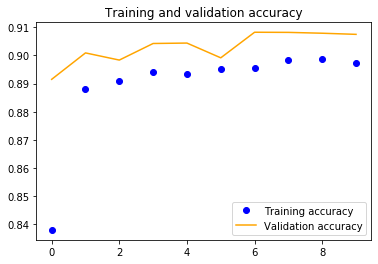

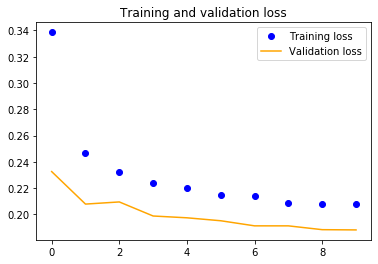

In [22]:
##plot the accuracy and loss plots between training and validation data to check for over-fitting

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = CNN_MODEL.history['accuracy']
val_accuracy = CNN_MODEL.history['val_accuracy']
loss = CNN_MODEL.history['loss']
val_loss = CNN_MODEL.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


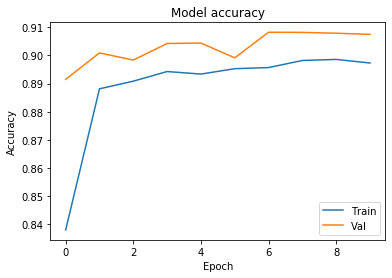

In [23]:
##plot our training accuracy and validation accuracy
plt.plot(CNN_MODEL.history['accuracy'])
plt.plot(CNN_MODEL.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [24]:
## Predicting using CNN
CNN_MODEL_pred = model.predict(x_test, batch_size=32, verbose=1)
CNN_MODEL_predicted = np.argmax(CNN_MODEL_pred, axis=1)

626/626 [==============================] - 1s 1ms/step


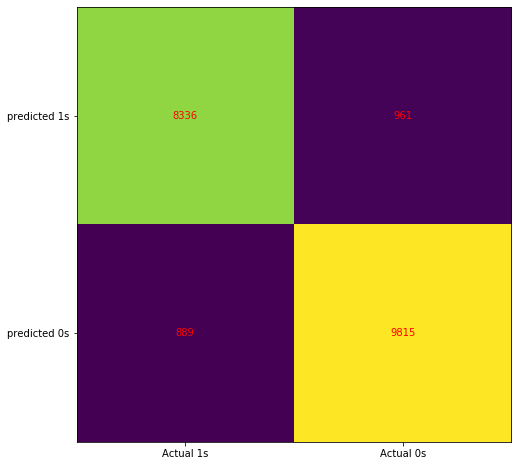

In [25]:
## Confusion matrix for the CNN
CNN_MODEL_cm = confusion_matrix(np.argmax(y_test, axis=1), CNN_MODEL_predicted)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(CNN_MODEL_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, CNN_MODEL_cm[i, j], ha= 'center', va= 'center', color= 'red')
plt.show()

In [26]:
test_cm = CNN_MODEL_cm

In [27]:
## Sensitivity Analysis 
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.9108203414996288


In [28]:
## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.9036314363143632


In [29]:
## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.9169469357249627


In [30]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.8966333225771754


C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


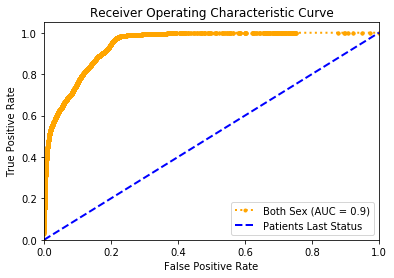

In [31]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 1

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], CNN_MODEL_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), CNN_MODEL_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='Both Sex (AUC = {0:0.1f})'
               ''.format(roc_auc["micro"]),marker = '.',
         color='orange', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'b--', label = 'Patients Last Status',linewidth=2, lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [1]:
## CONSIDER THE CONVOLUTIONAL NEURAL NETWORK FOR EACH GENDER SEPARATELY

In [2]:
## Modules required
import pandas as pd
import numpy as np
from scipy import misc 
from PIL import Image 
import glob 
from matplotlib.pyplot import imshow 
import seaborn as sn
import pickle 
from keras.preprocessing import image 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.imagenet_utils import decode_predictions 
from keras.utils import layer_utils, np_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from keras.utils.vis_utils import model_to_dot 
from keras.utils import plot_model 
from keras.initializers import glorot_uniform 
from keras import losses 
import keras.backend as K 
from keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix, classification_report 
from keras import layers 
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Input, Add, ZeroPadding2D, Conv2D, MaxPooling2D 
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [3]:
# Code
MBC = (pd.read_excel('MBC.xlsx'))

In [4]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split
#Import numpy#
import numpy as np

In [5]:
## CONSIDER FITTING CONVOLUTIONAL NEURAL NETWORK FOR THE MALE GENDER

In [6]:
MBC.head()

,PatStatus,Race,MarST,Gender,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,1,3,0,1,61,3,0,9,1,4,...,1,1,2,1,1,1,0,2,0,0
1,1,3,1,1,63,2,0,3,5,6,...,1,0,7,1,1,1,0,2,0,0
2,1,3,0,1,67,3,0,8,4,1,...,1,1,1,0,1,1,1,2,1,1
3,1,3,1,1,51,3,1,9,4,8,...,0,1,9,1,0,1,0,1,0,0
4,1,3,0,1,56,1,0,9,1,8,...,1,1,2,0,1,1,1,2,1,1


In [7]:
## Reshaping into array
MBC.iloc[3,1:].values.reshape(6,4).astype('int8')

array([[ 3,  1,  1, 51],
       [ 3,  1,  9,  4],
       [ 8,  1,  1,  0],
       [ 1,  1,  0,  1],
       [ 9,  1,  0,  1],
       [ 0,  1,  0,  0]], dtype=int8)

In [8]:
## Preprocessing the data

In [9]:
## Storing the independent variables array in form length, width, height into df_x
df_x = MBC.iloc[:,1:].values.reshape(len(MBC), 6, 4, 1)

## Storing the dependent variables in y
y = MBC.iloc[:,0].values

In [10]:
# converting y to categorical
df_y = keras.utils.to_categorical(y, num_classes = 2)


In [11]:
df_x =np.array(df_x)
df_y = np.array(df_y)

In [12]:
df_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [13]:
df_x.shape

(15599, 6, 4, 1)

In [14]:
df_y.shape

(15599, 2)

In [15]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y, test_size=0.2, random_state=123)


In [16]:
x_test.shape

(3120, 6, 4, 1)

In [17]:
y_test.shape

(3120, 2)

In [18]:
### CNN Model
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (6, 4, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.25)) 

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 2, 64)          640       
_________________________________________________________________
activation (Activation)      (None, 4, 2, 64)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [20]:
## fitting the model with 
CNN_MODEL = model.fit(x_train, y_train, batch_size=40, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
312/312 [==============================] - 1s 4ms/step - loss: 0.5219 - accuracy: 0.7045 - val_loss: 0.3930 - val_accuracy: 0.8240
Epoch 2/10
312/312 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9140 - val_loss: 0.1334 - val_accuracy: 0.9526
Epoch 3/10
312/312 [==============================] - 1s 4ms/step - loss: 0.1407 - accuracy: 0.9507 - val_loss: 0.1234 - val_accuracy: 0.9548
Epoch 4/10
312/312 [==============================] - 2s 7ms/step - loss: 0.1234 - accuracy: 0.9548 - val_loss: 0.1206 - val_accuracy: 0.9497
Epoch 5/10
312/312 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9578 - val_loss: 0.1221 - val_accuracy: 0.9545
Epoch 6/10
312/312 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9574 - val_loss: 0.1098 - val_accuracy: 0.9548
Epoch 7/10
312/312 [==============================] - 2s 7ms/step - loss: 0.1063 - accuracy: 0.9607 - val_loss: 0.1035 - val_accuracy: 0.9564
Epoch 

In [21]:
## MODEL EVALUATION

In [22]:
## Prediction loss and accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)[1]

In [23]:
print('Test accuracy:', test_eval)

Test accuracy: 0.9599359035491943


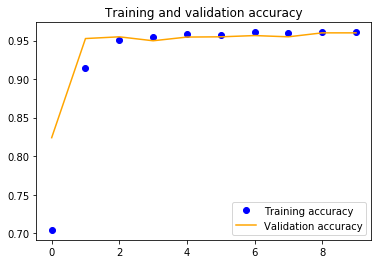

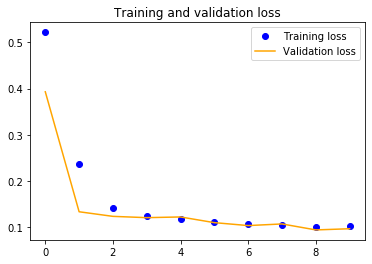

In [24]:
##plot the accuracy and loss plots between training and validation data to check for over-fitting

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = CNN_MODEL.history['accuracy']
val_accuracy = CNN_MODEL.history['val_accuracy']
loss = CNN_MODEL.history['loss']
val_loss = CNN_MODEL.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


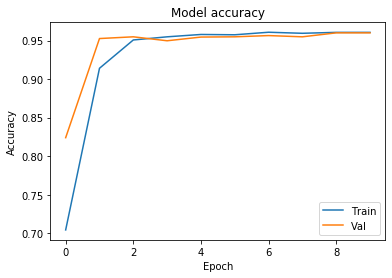

In [25]:
##plot our training accuracy and validation accuracy
plt.plot(CNN_MODEL.history['accuracy'])
plt.plot(CNN_MODEL.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [26]:
## Predicting using CNN
CNN_MODEL_pred = model.predict(x_test, batch_size=32, verbose=1)
CNN_MODEL_predicted = np.argmax(CNN_MODEL_pred, axis=1)

98/98 [==============================] - 0s 1ms/step


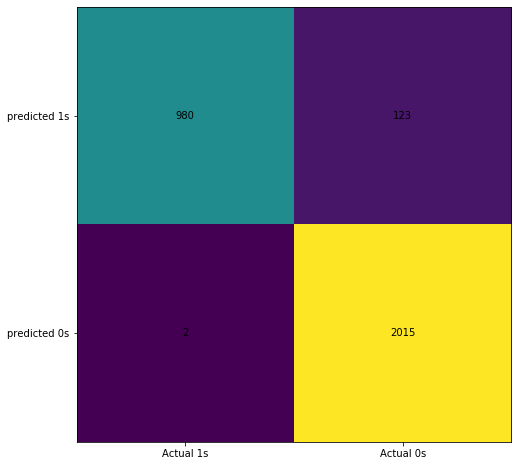

In [27]:
## Confusion matrix for the CNN
CNN_MODEL_cm = confusion_matrix(np.argmax(y_test, axis=1), CNN_MODEL_predicted)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(CNN_MODEL_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, CNN_MODEL_cm[i, j], ha= 'center', va= 'center', color= 'k')
plt.show()

In [28]:
test_cm = CNN_MODEL_cm

In [29]:
## Sensitivity Analysis 
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.9424695977549111


In [30]:
## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.9979633401221996


In [31]:
## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.999008428358949


In [32]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.8884859474161378


C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


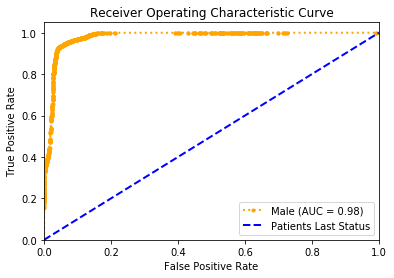

In [33]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 1

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], CNN_MODEL_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), CNN_MODEL_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='Male (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),marker = '.',
         color='orange', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'b--', label = 'Patients Last Status',linewidth=2, lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [1]:
## CONSIDERING THE FEMALE DATA SEPARATELY FOR THE ANALYSIS

In [2]:
## Modules required
import pandas as pd
import numpy as np
from scipy import misc 
from PIL import Image 
import glob 
from matplotlib.pyplot import imshow 
import seaborn as sn
import pickle 
from keras.preprocessing import image 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.imagenet_utils import decode_predictions 
from keras.utils import layer_utils, np_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from keras.utils.vis_utils import model_to_dot 
from keras.utils import plot_model 
from keras.initializers import glorot_uniform 
from keras import losses 
import keras.backend as K 
from keras.callbacks import ModelCheckpoint 
from sklearn.metrics import confusion_matrix, classification_report 
from keras import layers 
from IPython.display import SVG
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Input, Add, ZeroPadding2D, Conv2D, MaxPooling2D 
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [3]:
# Code
FBC = (pd.read_excel('FBC.xlsx'))

In [4]:
## CONSIDERING THE FEMALE DATA SEPARATELY FOR THE ANALYSIS
FBC.head()

,PatStatus,Race,MarST,Gender,AgeDiag,Grade,Stability,No.Visits,Lstay,Laterality,...,LyNode,Amorph,Size,Eggshell,Milk,AxiAden,Distroph,Lucent,Dermal,SkinnLesson
0,1,3,1,0,52,3,0,5,1,4,...,1,1,5,1,1,1,1,2,1,1
1,1,3,1,0,48,3,0,4,3,5,...,1,1,1,1,0,1,0,1,0,1
2,0,3,0,0,69,2,0,7,9,8,...,1,0,1,1,1,1,1,2,1,1
3,1,3,0,0,47,2,0,15,9,9,...,1,1,2,0,1,1,0,1,0,1
4,1,3,0,0,66,3,0,9,5,4,...,1,0,6,1,1,1,0,1,0,0


In [5]:
## The new fitted logistic regression model with selected variables
## Modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

## Reshaping into array
FBC.iloc[3,1:].values.reshape(6,4).astype('int8')

array([[ 3,  0,  0, 47],
       [ 2,  0, 15,  9],
       [ 9,  1,  1,  0],
       [ 3,  1,  1,  1],
       [ 2,  0,  1,  1],
       [ 0,  1,  0,  1]], dtype=int8)

In [6]:
## Preprocessing the data

In [7]:
## Storing the independent variables array in form length, width, height into df_x
df_x = FBC.iloc[:,1:].values.reshape(len(FBC), 6, 4, 1)

## Storing the dependent variables in y
y = FBC.iloc[:,0].values

In [8]:
# converting y to categorical
df_y = keras.utils.to_categorical(y, num_classes = 2)


In [9]:
df_x =np.array(df_x)
df_y = np.array(df_y)

In [10]:
df_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
df_x.shape

(84403, 6, 4, 1)

In [12]:
df_y.shape

(84403, 2)

In [13]:
#Import 'train_test_split' from 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

#Import numpy#
import numpy as np
#Split the data into train and test sets #
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y, test_size=0.2, random_state=123)


In [14]:
x_test.shape

(16881, 6, 4, 1)

In [15]:
y_test.shape

(16881, 2)

In [16]:
### CNN Model
model = Sequential()
model.add(Conv2D(64, (2,3), input_shape = (6, 4, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.25)) 

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 2, 64)          448       
_________________________________________________________________
activation (Activation)      (None, 5, 2, 64)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                41024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [18]:
## fitting the model with 
CNN_MODEL = model.fit(x_train, y_train, batch_size=30, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
2251/2251 [==============================] - 11s 5ms/step - loss: 0.3300 - accuracy: 0.8355 - val_loss: 0.2250 - val_accuracy: 0.8900
Epoch 2/10
2251/2251 [==============================] - 12s 5ms/step - loss: 0.2363 - accuracy: 0.8785 - val_loss: 0.2042 - val_accuracy: 0.8833
Epoch 3/10
2251/2251 [==============================] - 12s 5ms/step - loss: 0.2270 - accuracy: 0.8755 - val_loss: 0.2016 - val_accuracy: 0.8850
Epoch 4/10
2251/2251 [==============================] - 11s 5ms/step - loss: 0.2207 - accuracy: 0.8771 - val_loss: 0.1945 - val_accuracy: 0.8856
Epoch 5/10
2251/2251 [==============================] - 12s 5ms/step - loss: 0.2167 - accuracy: 0.8775 - val_loss: 0.1924 - val_accuracy: 0.8865
Epoch 6/10
2251/2251 [==============================] - 12s 5ms/step - loss: 0.2132 - accuracy: 0.8797 - val_loss: 0.1938 - val_accuracy: 0.8849
Epoch 7/10
2251/2251 [==============================] - 13s 6ms/step - loss: 0.2108 - accuracy: 0.8802 - val_loss: 0.1892 - val_ac

In [19]:
## MODEL EVALUATION

In [20]:
## Prediction loss and accuracy
test_eval = model.evaluate(x_test, y_test, verbose=0)[1]

In [21]:
print('Test accuracy:', test_eval)

Test accuracy: 0.8878028392791748


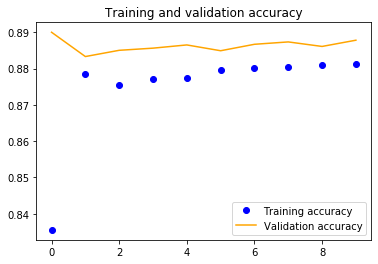

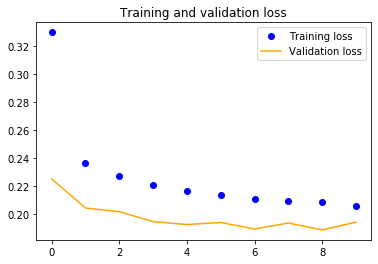

In [22]:
##plot the accuracy and loss plots between training and validation data to check for over-fitting

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = CNN_MODEL.history['accuracy']
val_accuracy = CNN_MODEL.history['val_accuracy']
loss = CNN_MODEL.history['loss']
val_loss = CNN_MODEL.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


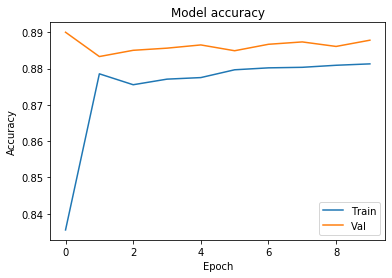

In [23]:
##plot our training accuracy and validation accuracy
plt.plot(CNN_MODEL.history['accuracy'])
plt.plot(CNN_MODEL.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
## Predicting using CNN
CNN_MODEL_pred = model.predict(x_test, batch_size=32, verbose=1)
CNN_MODEL_predicted = np.argmax(CNN_MODEL_pred, axis=1)

528/528 [==============================] - 1s 1ms/step


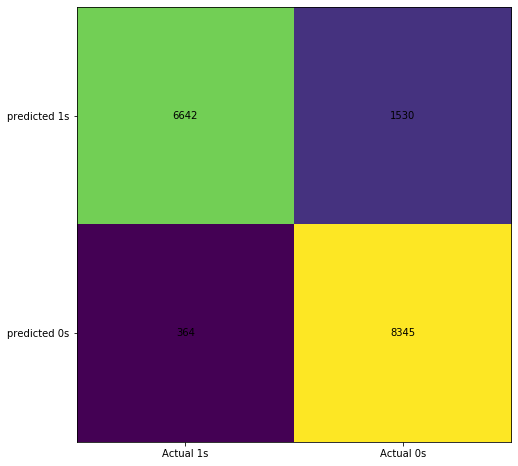

In [25]:
## Confusion matrix for the CNN
CNN_MODEL_cm = confusion_matrix(np.argmax(y_test, axis=1), CNN_MODEL_predicted)
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(CNN_MODEL_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('predicted 1s', 'predicted 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, CNN_MODEL_cm[i, j], ha= 'center', va= 'center', color= 'k')
plt.show()

In [26]:
test_cm = CNN_MODEL_cm

In [27]:
## Sensitivity Analysis 
test_sens = test_cm[1, 1]/(test_cm[1, 1] + test_cm[0, 1])
print(test_sens)

0.8450632911392405


In [28]:
## Specificity Analysis
test_spec = test_cm[0, 0]/(test_cm[0, 0]+test_cm[1, 0])
print(test_spec)

0.948044533257208


In [29]:
## PPV Analysis
test_npv = test_cm[1, 1]/(test_cm[1, 1] + test_cm[1, 0])
print(test_npv)

0.9582041566195889


In [30]:
## NPV Analysis
test_npv = test_cm[0, 0]/(test_cm[0, 0]+test_cm[0, 1])
print(test_npv)

0.8127753303964758


C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\eagye\anaconda1\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


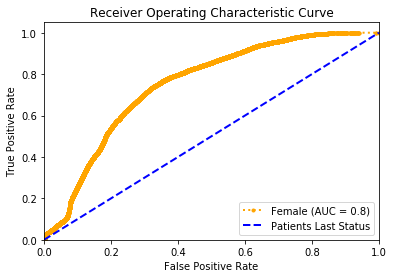

In [32]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 1

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], CNN_MODEL_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), CNN_MODEL_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='Female (AUC = {0:0.1f})'
               ''.format(roc_auc["micro"]),marker = '.',
         color='orange', linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], 'b--', label = 'Patients Last Status',linewidth=2, lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()